In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653242072.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of customers
i_data = pd.DataFrame()
len_ = 100

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]
i_data['Demand'] = [r.random() + r.randrange(50, 100) for _ in range(len_)]

i_data.head(10)

,X,Y,Demand
0,6.004181,-77.559890,61.708691
1,-65.541819,-15.257594,93.062301
2,38.944875,-40.713197,98.619260
3,-23.165286,5.716397,66.500005
4,-8.428242,17.539481,57.540779
5,5.569403,96.944752,63.434677
6,-4.849297,8.569604,90.655101
7,74.508735,-7.466595,60.529632
8,75.626700,51.777218,87.317964
9,-30.668385,54.343058,82.328049


In [6]:
# create set of candidate locations
j_data = pd.DataFrame()
len_ = 20

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]
j_data['Fixed Charge'] = [r.random() + r.randrange(5000, 10000) for _ in range(len_)]

j_data.head(10)

,X,Y,Fixed Charge
0,-25.825358,-6.192533,5070.774901
1,-28.084409,-98.785487,5900.186731
2,28.891098,-89.830972,5560.290251
3,-85.295710,-90.020941,8762.937603
4,-67.442761,-70.753623,8488.519176
5,5.726041,88.780999,7895.501696
6,-38.417556,19.184933,8288.068570
7,-11.751230,66.093472,9082.907380
8,-87.681973,-4.061576,9657.944063
9,-54.715157,36.119101,9169.773667


Text(0.5, 1.0, 'Customer and Facility Locations')

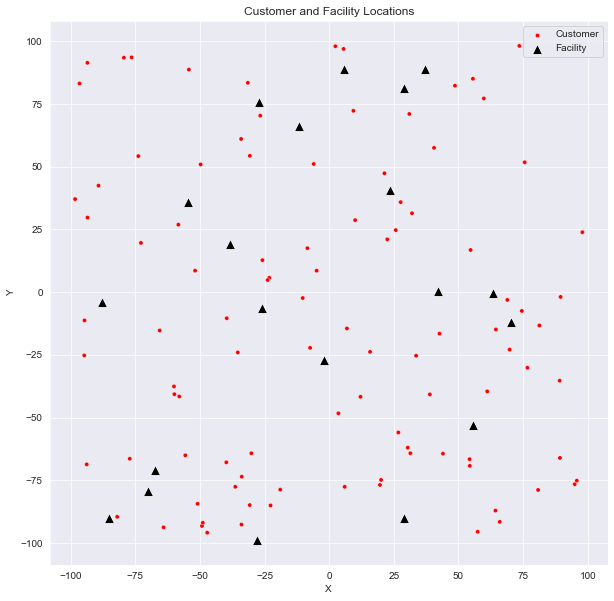

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Customer")
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^', label="Facility")
plt.legend()
plt.title('Customer and Facility Locations')

In [8]:
# create distance matrix
eucl = lambda x1, x2, y1, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].to_numpy()
j_loc = j_data[['X', 'Y']].to_numpy()

dist_ij = np.array([np.array([eucl(i[0],i[1],j[0],j[1]) for j in j_loc]) for i in i_loc])
dist_ij

array([[ 85.83939607, 109.46047888, 145.18224374, ...,  98.78072259,  85.32807354,  87.30145725],
       [ 53.98102615,  86.75912462, 128.93189351, ...,  72.82293884,  53.16417404,  56.27693759],
       [ 82.04179666, 106.50845468, 142.9697114 , ...,  95.49913945,  81.50665381,  83.57032319],
       ...,
       [ 57.27527529,  88.8462249 , 130.34546075, ...,  75.29731998,  56.50606495,  59.44408868],
       [116.53707678, 134.88545061, 165.19797893, ..., 126.37293817, 116.16095937, 117.6181652 ],
       [144.28674721, 159.4736967 , 185.81751101, ..., 152.34137539, 143.98313664, 145.16131695]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
